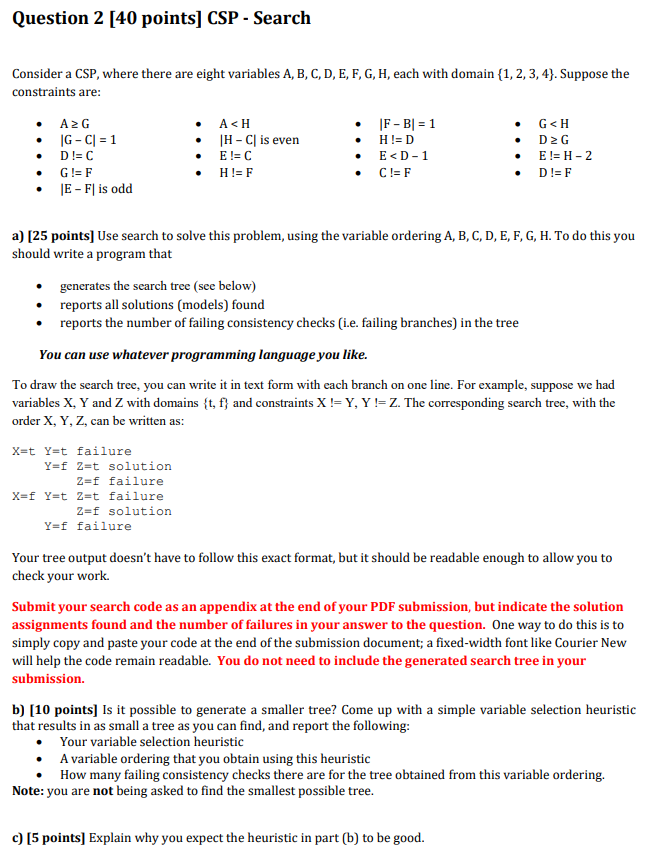

In [1]:
from collections import namedtuple

In [2]:
State = namedtuple('State', ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
Node = namedtuple('Node', ['state', 'children'])

## Constraint Validation

In [3]:
def none_zero(s):
    return (s.a != 0) and (s.b != 0) and (s.c != 0) and (s.d != 0) and (s.e != 0) and (s.f != 0) and (s.g != 0) and (s.h != 0)

def success(s):
    
    succeeded = (none_zero(s) and (s.a >= s.g) and (s.a < s.h) and (abs(s.f - s.b) == 1) and (s.g < s.h) and 
                (abs(s.g - s.c) == 1) and (abs(s.h - s.c) % 2 == 0) and (s.h != s.d) and (s.d >= s.g) and 
                (s.d != s.c) and (s.e != s.c) and (s.e < (s.d - 1)) and (s.e != (s.h - 2)) and 
                (s.g != s.f) and (s.h != s.f) and (s.c != s.f) and (s.d != s.f) and 
                (abs(s.e - s.f) % 2 != 0))
    
    return succeeded

def keep_search(s):
    
    ks = (((s.a >= s.g) or (s.a == 0) or (s.g == 0)) and
          ((s.a < s.h) or (s.a == 0) or (s.h == 0)) and
          ((abs(s.f - s.b) == 1) or (s.f == 0) or (s.b == 0)) and
          ((s.g < s.h) or (s.g == 0) or (s.h == 0)) and
          ((abs(s.g - s.c) == 1) or (s.g == 0) or (s.c == 0)) and
          ((abs(s.h - s.c) % 2 == 0) or (s.h == 0) or (s.c == 0)) and
          ((s.h != s.d) or (s.h == 0) or (s.d == 0)) and
          ((s.d >= s.g) or (s.d == 0) or s.g == 0) and
          ((s.d != s.c) or (s.d == 0) or (s.c == 0)) and
          ((s.e != s.c) or (s.e == 0) or (s.c == 0)) and
          ((s.e < (s.d - 1)) or (s.e == 0) or (s.d == 0)) and
          ((s.e != (s.h - 2)) or (s.e == 0) or s.h == 0) and
          ((s.g != s.f) or (s.g == 0) or (s.f == 0)) and
          ((s.h != s.f) or (s.h == 0) or (s.f == 0)) and
          ((s.c != s.f) or (s.c == 0) or (s.f == 0)) and
          ((s.d != s.f) or (s.d == 0) or (s.f == 0)) and
          ((abs(s.e - s.f) % 2 != 0) or (s.e == 0) or (s.f == 0)))
    
    return ks

## Generate Next States

In [4]:
def gen_children_with_heuristic(n):
    s = n.state
    s1 = State(0,0,0,0,0,0,0,0)
    s2 = State(0,0,0,0,0,0,0,0)
    s3 = State(0,0,0,0,0,0,0,0)
    s4 = State(0,0,0,0,0,0,0,0)
    
    if (s.f == 0):
        s1 = State(0,0,0,0,0,1,0,0)
        s2 = State(0,0,0,0,0,2,0,0)
        s3 = State(0,0,0,0,0,3,0,0)
        s4 = State(0,0,0,0,0,4,0,0)
    elif (s.h == 0):
        s1 = State(0,0,0,0,0,s.f,0,1)
        s2 = State(0,0,0,0,0,s.f,0,2)
        s3 = State(0,0,0,0,0,s.f,0,3)
        s4 = State(0,0,0,0,0,s.f,0,4)
    elif (s.c == 0):
        s1 = State(0,0,1,0,0,s.f,0,s.h)
        s2 = State(0,0,2,0,0,s.f,0,s.h)
        s3 = State(0,0,3,0,0,s.f,0,s.h)
        s4 = State(0,0,4,0,0,s.f,0,s.h)
    elif (s.d == 0):
        s1 = State(0,0,s.c,1,0,s.f,0,s.h)
        s2 = State(0,0,s.c,2,0,s.f,0,s.h)
        s3 = State(0,0,s.c,3,0,s.f,0,s.h)
        s4 = State(0,0,s.c,4,0,s.f,0,s.h)
    elif (s.g == 0):
        s1 = State(0,0,s.c,s.d,0,s.f,1,s.h)
        s2 = State(0,0,s.c,s.d,0,s.f,2,s.h)
        s3 = State(0,0,s.c,s.d,0,s.f,3,s.h)
        s4 = State(0,0,s.c,s.d,0,s.f,4,s.h)
    elif (s.e == 0):
        s1 = State(0,0,s.c,s.d,1,s.f,s.g,s.h)
        s2 = State(0,0,s.c,s.d,2,s.f,s.g,s.h)
        s3 = State(0,0,s.c,s.d,3,s.f,s.g,s.h)
        s4 = State(0,0,s.c,s.d,4,s.f,s.g,s.h)
    elif (s.a == 0):
        s1 = State(1,0,s.c,s.d,s.e,s.f,s.g,s.h)
        s2 = State(2,0,s.c,s.d,s.e,s.f,s.g,s.h)
        s3 = State(3,0,s.c,s.d,s.e,s.f,s.g,s.h)
        s4 = State(4,0,s.c,s.d,s.e,s.f,s.g,s.h)
    elif (s.b == 0):
        s1 = State(s.a,1,s.c,s.d,s.e,s.f,s.g,s.h)
        s2 = State(s.a,2,s.c,s.d,s.e,s.f,s.g,s.h)
        s3 = State(s.a,3,s.c,s.d,s.e,s.f,s.g,s.h)
        s4 = State(s.a,4,s.c,s.d,s.e,s.f,s.g,s.h)
        
    return [Node(s1,[]), Node(s2,[]), Node(s3,[]), Node(s4,[])]
    
    
def gen_children(n):
    
    s = n.state
    s1 = State(0,0,0,0,0,0,0,0)
    s2 = State(0,0,0,0,0,0,0,0)
    s3 = State(0,0,0,0,0,0,0,0)
    s4 = State(0,0,0,0,0,0,0,0)
    
    if (s.a == 0):
        s1 = State(1,0,0,0,0,0,0,0)
        s2 = State(2,0,0,0,0,0,0,0)
        s3 = State(3,0,0,0,0,0,0,0)
        s4 = State(4,0,0,0,0,0,0,0)
    elif (s.b == 0):
        s1 = State(s.a,1,0,0,0,0,0,0)
        s2 = State(s.a,2,0,0,0,0,0,0)
        s3 = State(s.a,3,0,0,0,0,0,0)
        s4 = State(s.a,4,0,0,0,0,0,0)
    elif (s.c == 0):
        s1 = State(s.a,s.b,1,0,0,0,0,0)
        s2 = State(s.a,s.b,2,0,0,0,0,0)
        s3 = State(s.a,s.b,3,0,0,0,0,0)
        s4 = State(s.a,s.b,4,0,0,0,0,0)
    elif (s.d == 0):
        s1 = State(s.a,s.b,s.c,1,0,0,0,0)
        s2 = State(s.a,s.b,s.c,2,0,0,0,0)
        s3 = State(s.a,s.b,s.c,3,0,0,0,0)
        s4 = State(s.a,s.b,s.c,4,0,0,0,0)
    elif (s.e == 0):
        s1 = State(s.a,s.b,s.c,s.d,1,0,0,0)
        s2 = State(s.a,s.b,s.c,s.d,2,0,0,0)
        s3 = State(s.a,s.b,s.c,s.d,3,0,0,0)
        s4 = State(s.a,s.b,s.c,s.d,4,0,0,0)
    elif (s.f == 0):
        s1 = State(s.a,s.b,s.c,s.d,s.e,1,0,0)
        s2 = State(s.a,s.b,s.c,s.d,s.e,2,0,0)
        s3 = State(s.a,s.b,s.c,s.d,s.e,3,0,0)
        s4 = State(s.a,s.b,s.c,s.d,s.e,4,0,0)
    elif (s.g == 0):
        s1 = State(s.a,s.b,s.c,s.d,s.e,s.f,1,0)
        s2 = State(s.a,s.b,s.c,s.d,s.e,s.f,2,0)
        s3 = State(s.a,s.b,s.c,s.d,s.e,s.f,3,0)
        s4 = State(s.a,s.b,s.c,s.d,s.e,s.f,4,0)
    elif (s.h == 0):
        s1 = State(s.a,s.b,s.c,s.d,s.e,s.f,s.g,1)
        s2 = State(s.a,s.b,s.c,s.d,s.e,s.f,s.g,2)
        s3 = State(s.a,s.b,s.c,s.d,s.e,s.f,s.g,3)
        s4 = State(s.a,s.b,s.c,s.d,s.e,s.f,s.g,4)
        
    return [Node(s1,[]), Node(s2,[]), Node(s3,[]), Node(s4,[])]

## Search Algorithm: DFS with Pruning

In [5]:
def genDFS(use_heuristic):
    root_state = State(0,0,0,0,0,0,0,0)
    root_node = Node(root_state, [])
    
    frontier = [root_node] 
    solutions = []
    failing_consistency_checks = 0
    
    while frontier != []:
        cn = frontier.pop()
        
        if success(cn.state):
            solutions.append(cn.state)
                
        elif (keep_search(cn.state)):
            if use_heuristic:
                childs = gen_children_with_heuristic(cn)
            else:
                childs = gen_children(cn)
            for child in childs:
                frontier.append(child)
                cn.children.append(child)
                
        else:
            failing_consistency_checks += 1
            
    return [solutions, root_node, failing_consistency_checks]

In [6]:
def print_solutions(state_list):
    for i in range(len(state_list)):
        s = state_list[i]
        print("Solution " + str(i + 1) + ": {" + "A = " + str(s.a) + ", " + "B = " + str(s.b) + ", " + "C = " + str(s.c) + ", " + "D = " + str(s.d) + ", " + 
             "E = " + str(s.e) + ", " + "F = " + str(s.f) + ", " + "G = " + str(s.g) + ", " + "H = " + str(s.h) + "}")

## Question 2a

In [7]:
print("Question 2a:")
print("------------")
result = genDFS(False)
print_solutions(result[0])
print("# of Failures: " + str(result[2]))
print ("")

Question 2a:
------------
Solution 1: {A = 3, B = 3, C = 4, D = 3, E = 1, F = 2, G = 3, H = 4}
Solution 2: {A = 3, B = 1, C = 4, D = 3, E = 1, F = 2, G = 3, H = 4}
Solution 3: {A = 2, B = 2, C = 3, D = 4, E = 2, F = 1, G = 2, H = 3}
Solution 4: {A = 1, B = 3, C = 2, D = 3, E = 1, F = 4, G = 1, H = 2}
# of Failures: 1278



## Question 2b

In [8]:
print("\nQuestion 2b:")
print("------------")
result = genDFS(True)
print_solutions(result[0])
print("# of Failures " + str(result[2]))


Question 2b:
------------
Solution 1: {A = 1, B = 3, C = 2, D = 3, E = 1, F = 4, G = 1, H = 2}
Solution 2: {A = 3, B = 3, C = 4, D = 3, E = 1, F = 2, G = 3, H = 4}
Solution 3: {A = 3, B = 1, C = 4, D = 3, E = 1, F = 2, G = 3, H = 4}
Solution 4: {A = 2, B = 2, C = 3, D = 4, E = 2, F = 1, G = 2, H = 3}
# of Failures 258


Same solutions were found, but with much fewer failures.
_Variable Heuristic:_ Recursively choose the variable that shares the most constraints with
variables that have already been chosen. If no variables have been chosen or there is a tie, choose
the variable that is in the largest number of constraints in general.
_Variable Order:_ F, H, C, D, G, E, A, B

## Question 2c

Our reasoning for our heuristic is that depending on the order of variables, you can fail to
satisfy a constraint for the same reason at different depths of the tree. If you can fail earlier, it
means you wasted less time. So ideally you always try to fail as fast as you can. In order to
achieve this, we try to create as much “conflict” between the variables as possible as quickly as
we can. By adding variables that have the most constraints first, it is more likely that they will
have conflict with each other and fail sooner.